# Reconstruction of Pleistocene climate based on assemblages of Mammal

Programming Project "Yankovich Cave"

Author: Alraune Zech (Example solution)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in data from Table 2 of vole counts
table2 = "../data/Table2.csv"
data4names = np.genfromtxt(table2, delimiter = ',',names = True)
names = list(data4names.dtype.names)
data = np.genfromtxt(table2, delimiter = ',', skip_header = 1)

layer = data[:,0]
age = data[:,1]
data_sum_rel = np.cumsum(data[:,2:],axis = 1)

In [3]:
# print(names)
# print(data)
# print(data.shape)

## 3. Analysis of microfossil remains
### 3.1 Vole assemblages

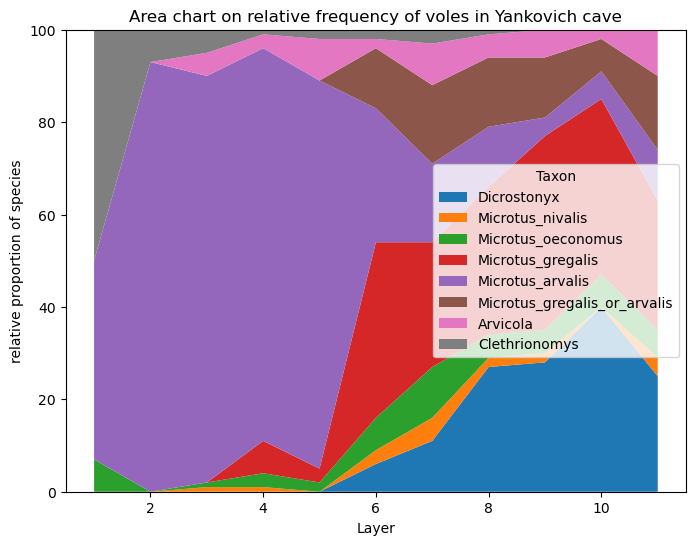

In [4]:
# area chart for layers
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(layer,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(layer,data_sum_rel[:,i-1],data_sum_rel[:,i])                 

plt.xlabel('Layer')
plt.ylim([0,100])
plt.ylabel('relative proportion of species')
plt.title('Area chart on relative frequency of voles in Yankovich cave')
plt.legend(names[2:],loc = 'center right',title = 'Taxon')

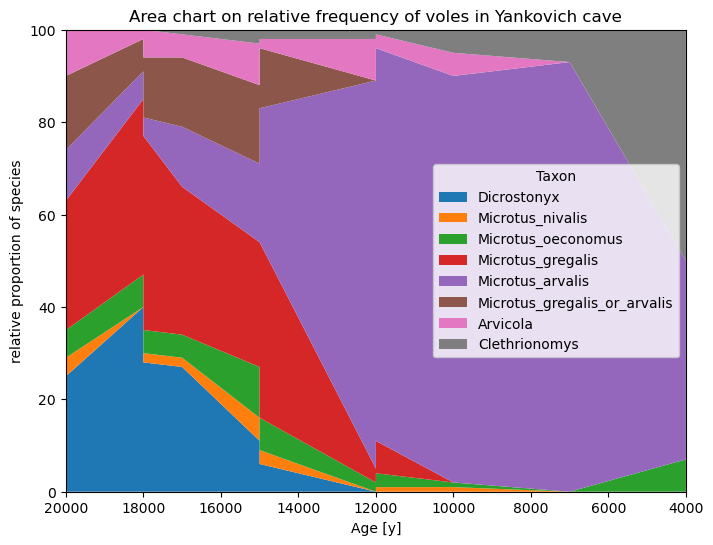

In [5]:
# area chart for ages
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(age,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(age,data_sum_rel[:,i-1],data_sum_rel[:,i])                 

plt.xlim([age[0],age[-1]])
plt.xlabel('Age [y]')
plt.ylim([0,100])
plt.ylabel('relative proportion of species')
plt.title('Area chart on relative frequency of voles in Yankovich cave')
plt.legend(names[2:],loc = 'center right',title = 'Taxon')



### 3.2 Biotope reconstruction

In [6]:
table2_biotopes = "./data/Table2_biotopes.csv"
biotopes  = ['Layer','Age','tundra', 'dry_grassland',	'wet_areas', 'open_grassland',	'tundra_open_grassland', 'lakes_rivers', 'covered_soil']

In [7]:
# create adapted version of Table 2 for biotopes including summation of similar biotopes
data_biotopes = data[:,:]
data_biotopes[:,2] += data_biotopes[:,5]
data_biotopes = np.delete(data_biotopes,5, axis=1)
np.savetxt(table2_biotopes,data_biotopes, delimiter = ',', header = ','.join(str(e) for e in biotopes))

In [8]:
# read in information from adapted version of Table 2 for biotopes including summation of similar biotopes
data_biotope = np.genfromtxt(table2_biotopes, delimiter = ',', skip_header = 1)
layer = data_biotope[:,0]
age = data_biotope[:,1]
data_sum_rel = np.cumsum(data_biotope[:,2:],axis = 1)

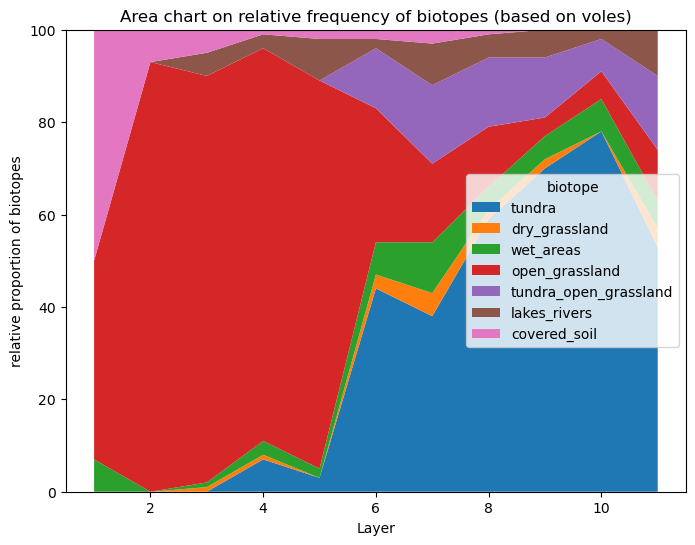

In [9]:
# area chart for layers
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(layer,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(layer,data_sum_rel[:,i-1],data_sum_rel[:,i])                 

plt.ylim([0,100])
plt.xlabel('Layer')
plt.ylabel('relative proportion of biotopes')
plt.title('Area chart on relative frequency of biotopes (based on voles)')
plt.legend(biotopes[2:],loc = 'center right',title = 'biotope')


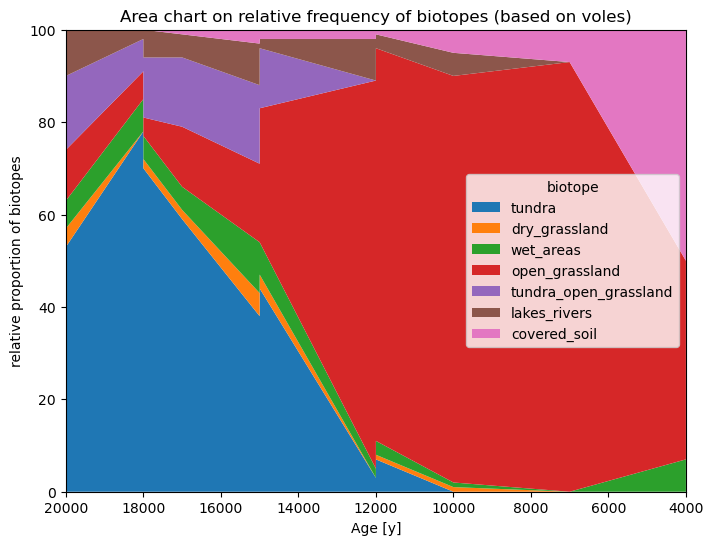

In [10]:
# area chart for ages
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(age,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(age,data_sum_rel[:,i-1],data_sum_rel[:,i])                 

plt.xlim([age[0],age[-1]])
plt.ylim([0,100])
plt.xlabel('Age [y]')
plt.ylabel('relative proportion of biotopes')
plt.title('Area chart on relative frequency of biotopes (based on voles)')
plt.legend(biotopes[2:],loc = 'center right',title = 'biotope')


### 3.3 Assemblages of other vertebrates

In [11]:
table4 = "../data/Table4.csv"

data4names = np.genfromtxt(table4, delimiter = ',',names = True)
names_vert = list(data4names.dtype.names)
print(names_vert)

data_vert = np.genfromtxt(table4, delimiter = ',', skip_header = 1)
layer = data_vert[:,0]
age = data_vert[:,1]
data_sum_rel = np.cumsum(data_vert[:,2:],axis = 1)

['Layer', 'Age', 'Lacerta', 'Ophidia', 'Ochotona', 'Spermophilus_citellus', 'Sicista', 'Cricetulus', 'Apodemus']


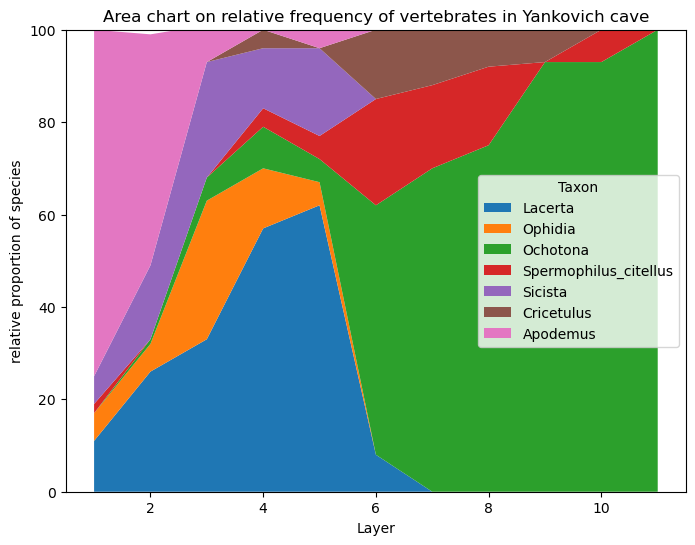

In [12]:
# area chart for layers
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(layer,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(layer,data_sum_rel[:,i-1],data_sum_rel[:,i])                 

plt.xlabel('Layer')
plt.ylim([0,100])
plt.ylabel('relative proportion of species')
plt.title('Area chart on relative frequency of vertebrates in Yankovich cave')
plt.legend(names_vert[2:],loc = 'center right',title = 'Taxon')

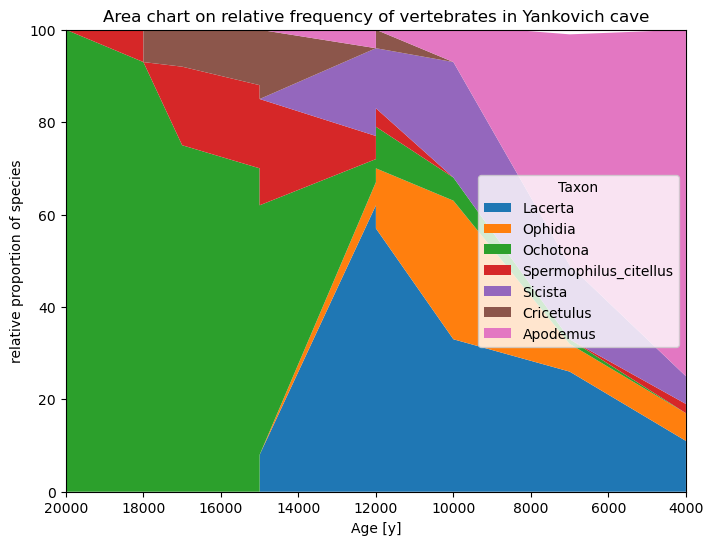

In [13]:
# area chart for ages
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(age,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(age,data_sum_rel[:,i-1],data_sum_rel[:,i])                 

plt.xlim([age[0],age[-1]])
plt.ylim([0,100])
plt.xlabel('Age [y]')
plt.ylabel('relative proportion of species')
plt.title('Area chart on relative frequency of vertebrates in Yankovich cave')
plt.legend(names_vert[2:],loc = 'center right',title = 'Taxon')

Assemblages of biotopes based on other vertebrates

In [14]:
table4_biotopes = "./data/Table4_biotopes.csv"
biotopes_vert  = ['Layer','Age', 'dry_environment','steppe_grassland','short_grass_steppe','forest_steppe','forest_bushes']


In [15]:
# create adapted version of Table 4 for biotopes including summation of similar biotopes
data_vert_biotopes = data_vert[:,:]
data_vert_biotopes[:,2] += data_vert_biotopes[:,3]
data_vert_biotopes[:,4] += data_vert_biotopes[:,6]
data_vert_biotopes = np.delete(data_vert_biotopes,[3,6], axis=1)
np.savetxt(table4_biotopes,data_vert_biotopes, delimiter = ',', header = ','.join(str(e) for e in biotopes_vert))

In [16]:
# read in data from adapted version of Table 4 for biotopes 
data_vert_biotopes = np.genfromtxt(table4_biotopes, delimiter = ',', skip_header = 1)
layer = data_vert_biotopes[:,0]
age = data_vert_biotopes[:,1]
data_sum_rel = np.cumsum(data_vert_biotopes[:,2:],axis = 1)

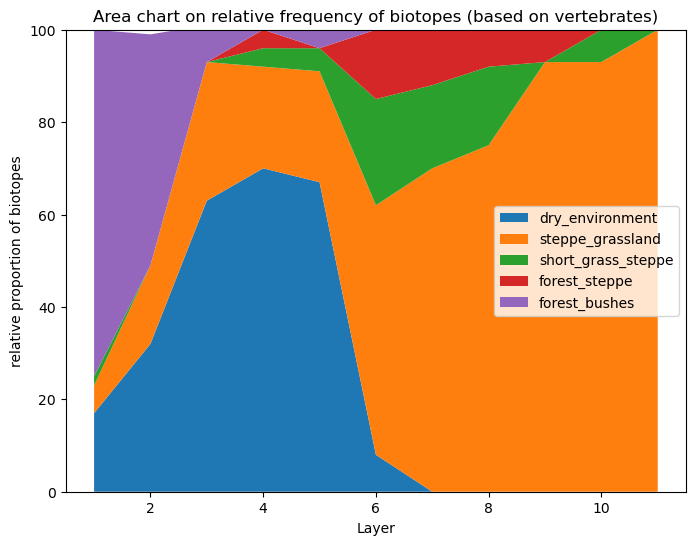

In [17]:
### area chart for layer
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(layer,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(layer,data_sum_rel[:,i-1],data_sum_rel[:,i])                 
#    plt.plot(age,data_sum_rel[:,i],'-o')

plt.xlabel('Layer')
plt.ylim([0,100])
plt.ylabel('relative proportion of biotopes')
plt.title('Area chart on relative frequency of biotopes (based on vertebrates)')
plt.legend(biotopes_vert[2:],loc = 'center right')

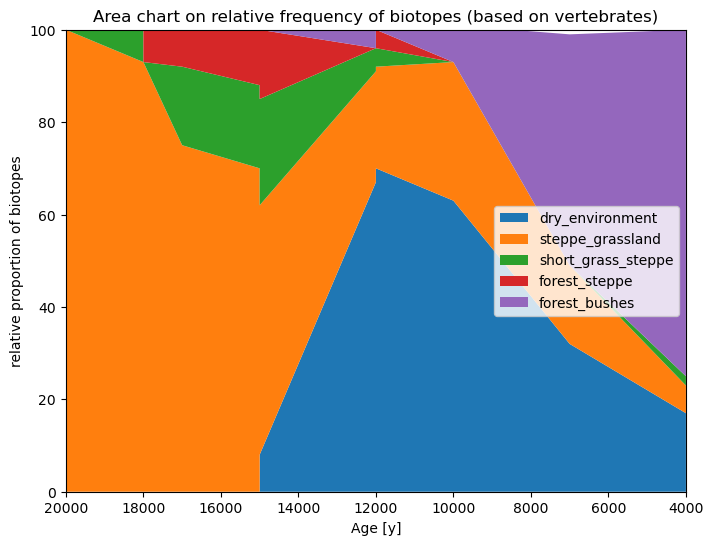

In [18]:
### area chart for ages
plt.figure(figsize = [8,6])
for i in range(data_sum_rel.shape[1]):
    if i == 0:
        plt.fill_between(age,np.zeros(len(age)),data_sum_rel[:,i])         
    else:
        plt.fill_between(age,data_sum_rel[:,i-1],data_sum_rel[:,i])                 
#    plt.plot(age,data_sum_rel[:,i],'-o')

plt.xlim([age[0],age[-1]])
plt.ylim([0,100])
plt.xlabel('Age [y]')
plt.ylabel('relative proportion of biotopes')
plt.title('Area chart on relative frequency of biotopes (based on vertebrates)')
plt.legend(biotopes_vert[2:],loc = 'center right')

## 4. Comparison with biomes from a climate model

Text(0, 0.5, 'Temperature [C]')

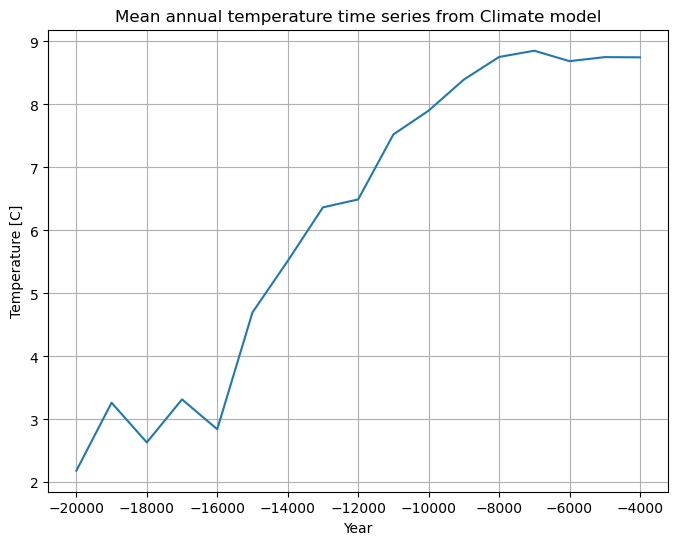

In [19]:
data = np.loadtxt('./data/MeanAnnualTemp.csv',delimiter = ',')
imin = np.argmin(abs(data[:,0]+age[0])) # index in time series with earliest age in the cave
imax = np.argmin(abs(data[:,0]+age[-1])) # index in time series with youngest age in the cave
#print(i20,data[i20,0])
plt.figure(figsize = [8,6])
plt.plot(data[imin:imax+1,0],data[imin:imax+1,1])
plt.grid(True)
plt.title('Mean annual temperature time series from Climate model')
plt.xlabel('Year')
plt.ylabel('Temperature [C]')


In [20]:
import netCDF4 as nc4

climate_file = './data/LateQuaternary_Environment.nc'

## Read variables from NetCDF file
nc = nc4.Dataset(climate_file,'r')
longitude   = nc.variables['longitude'][:]
latitude    = nc.variables['latitude'][:]
years       = nc.variables['time'][:]
months      = nc.variables['month'][:]
temperature = nc.variables['temperature'][:]
biome       = nc.variables['biome'][:]

## Specify relevant point in time and space
my_year      = -20000    # 10,000 BP - ADAPT here!
my_longitude = 18.555731    # - ADAPT here! I used latlon of Bajot, Hungary
my_latitude  = 47.727139   # - ADAPT here!

LON,LAT = np.meshgrid(longitude,latitude)

# use nearest grid points (alternatively, use 3D interpolation)
lonID   = np.argmin(np.abs(longitude - my_longitude));
latID   = np.argmin(np.abs(latitude - my_latitude));
yearID  = np.argmin(np.abs(years - my_year));

print("Lon and lat grid IDs of the cave:",lonID,latID)


Lon and lat grid IDs of the cave: 397 215


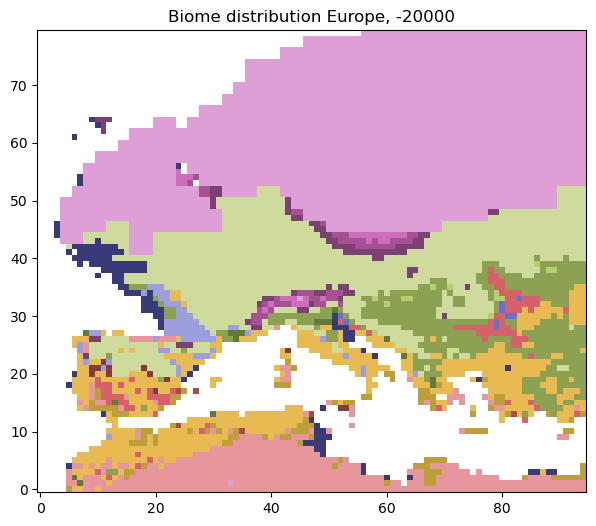

In [21]:
## Global biome map
plt.figure(figsize = [8,6])
plt.imshow(biome[years == my_year,180:260,335:430].squeeze(),cmap = 'tab20b')
plt.title('Biome distribution Europe, {}'.format(my_year))
plt.gca().invert_yaxis()


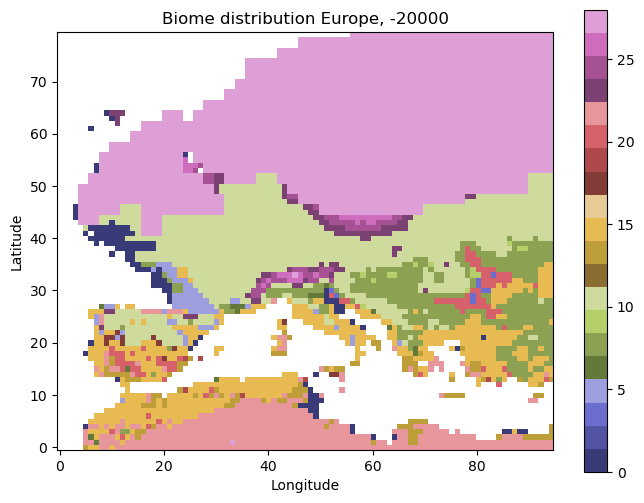

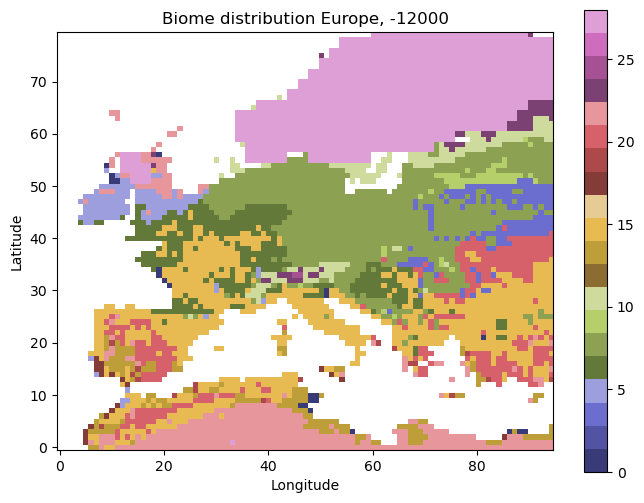

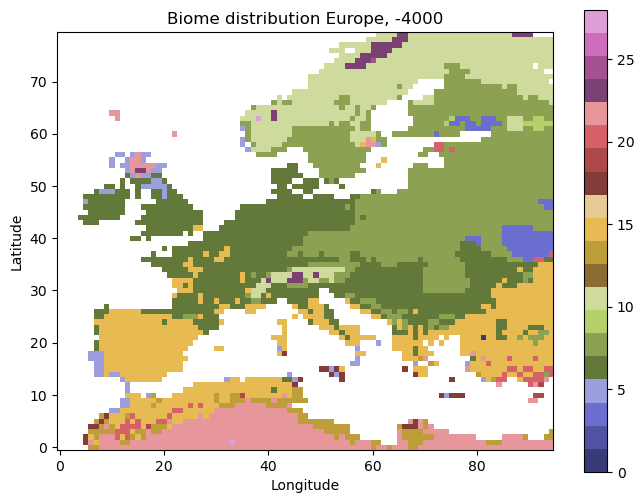

In [22]:
## Global biome map
for i,my_year in enumerate([-20000,-12000,-4000]):
    plt.figure(i,figsize = [8,6])
    plt.imshow(biome[years == my_year,180:260,335:430].squeeze(),cmap = 'tab20b')
    plt.colorbar()
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title('Biome distribution Europe, {}'.format(my_year))
    plt.gca().invert_yaxis()
